In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Configuración warnings
# ==============================================================================
import warnings
#warnings.filterwarnings('ignore')

In [2]:
!pip install skforecast

  Using cached skforecast-0.4.3-py2.py3-none-any.whl (87 kB)
  Using cached statsmodels-0.13.0.tar.gz (17.8 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [285 lines of output]
      Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8"' don't match your environment
      Ignoring numpy: markers 'python_version > "3.9"' don't match your environment
        Using cached setuptools-65.3.0-py3-none-any.whl (1.2 MB)
        Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
        Using cached Cython-0.29.32-py2.py3-none-any.whl (986 kB)
        Using cached numpy-1.19.4.zip (7.3 MB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting require

In [7]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

ModuleNotFoundError: No module named 'skforecast'

In [ ]:
# Descarga de datos
# ==============================================================================
from datetime import datetime
import yfinance as yf

stocks = ["BTC-USD", "ETH-USD", "USDT-USD", "XRP-USD", "BCH-USD", "LTC-USD", "DOT1-USD", "BNB-USD", "RVN-USD", "XMR-USD", "ETC-USD", "DOGE-USD"]
start = '2016-01-01'
end = datetime.now()
data = yf.download(stocks, start=start, end=end)
d1 = data.copy()

[*********************100%***********************]  12 of 12 completed


In [93]:
d1.describe()

Adj Close                                                    \
           BCH-USD      BNB-USD       BTC-USD     DOGE-USD  DOT1-USD   
count  1548.000000  1548.000000   2226.000000  1548.000000   1.00000   
mean    542.198033   111.322127  13434.253641     0.054079  24.87994   
std     466.274210   180.533701  16707.899677     0.106197       NaN   
min      77.365776     1.510360    364.330994     0.001038  24.87994   
25%     251.152096    12.934050   2668.765015     0.002500  24.87994   
50%     413.749344    19.482122   7469.724854     0.003184  24.87994   
75%     629.645355    41.267660  11568.815674     0.009858  24.87994   
max    3923.070068   675.684082  67566.828125     0.684777  24.87994   

                                                                        ...  \
           EOS-USD      ETC-USD      ETH-USD      LTC-USD     USDT-USD  ...   
count  1548.000000  1548.000000  1548.000000  2226.000000  1548.000000  ...   
mean      4.828956    18.246567   969.438499    79.271509     1.001938  ...   
std       2.907686    19.148722  1206.634622    71.188845     0.006225  ...   
min       1.030650     3.472387    84.308296     2.996780     0.966644  ...   
25%       2.795123     5.676173   191.052818    31.189408     1.000039  ...   
50%       3.913015     8.740427   376.205460    56.846037     1.000820  ...   
75%       5.594296    24.138487  1247.804291   123.201481     1.003177  ...   
max      21.542601   134.101791  4812.087402   386.450775     1.077880  ...   

             Volume                                                          \
            BTC-USD      DOGE-USD      DOT1-USD       EOS-USD       ETC-USD   
count  2.226000e+03  1.548000e+03  1.000000e+00  1.548000e+03  1.548000e+03   
mean   1.774670e+10  1.047319e+09  1.280067e+09  1.939691e+09  1.126082e+09   
std    2.080280e+10  3.790469e+09           NaN  1.680709e+09  2.098540e+09   
min    2.851400e+07  1.431720e+06  1.280067e+09  2.084860e+07  7.347600e+07   
25%    1.226497e+09  1.984340e+07  1.280067e+09  8.294232e+08  2.950450e+08   
50%    9.778043e+09  6.933466e+07  1.280067e+09  1.592640e+09  6.220223e+08   
75%    2.901802e+10  3.658166e+08  1.280067e+09  2.477479e+09  1.167530e+09   
max    3.509679e+11  6.941068e+10  1.280067e+09  2.032871e+10  4.272141e+10   

                                                                             
            ETH-USD       LTC-USD      USDT-USD       XMR-USD       XRP-USD  
count  1.548000e+03  2.226000e+03  1.548000e+03  1.548000e+03  1.548000e+03  
mean   1.239384e+10  1.925055e+09  3.871264e+10  2.978549e+08  2.806445e+09  
std    1.137405e+10  2.418551e+09  4.031019e+10  1.176186e+09  3.953460e+09  
min    6.217330e+08  5.074800e+05  3.581880e+08  1.016030e+07  1.002940e+08  
25%    2.996675e+09  1.769595e+08  3.933316e+09  6.219382e+07  7.991541e+08  
50%    9.185708e+09  1.001790e+09  2.599764e+10  1.162574e+08  1.595226e+09  
75%    1.789345e+10  2.928295e+09  5.779687e+10  2.224279e+08  2.998050e+09  
max    8.448291e+10  1.799426e+10  2.790675e+11  2.895912e+10  3.695518e+10  

[8 rows x 72 columns]

In [7]:
import pandas as pd
datos= d1.copy()
datos.reset_index(level=0, inplace=True)
datos['Date'] = pd.to_datetime(datos['Date'])
datos = datos.set_index('Date')
#datos.set_axis(datos['Date'], inplace=True)
#datos.drop(columns=['Open', 'Date','High', 'Low', 'Volume'], inplace=True)
#datos.reset_index(level=0, inplace=True)
datos = datos.rename(columns={'Close': 'y'})
datos = datos.asfreq('1D')
datos = datos.sort_index()
datos.head()

Adj Close                                                        \
             BCH-USD BNB-USD     BTC-USD DOGE-USD DOT1-USD EOS-USD ETC-USD   
Date                                                                         
2016-01-01       NaN     NaN  434.334015      NaN      NaN     NaN     NaN   
2016-01-02       NaN     NaN  433.437988      NaN      NaN     NaN     NaN   
2016-01-03       NaN     NaN  430.010986      NaN      NaN     NaN     NaN   
2016-01-04       NaN     NaN  433.091003      NaN      NaN     NaN     NaN   
2016-01-05       NaN     NaN  431.959991      NaN      NaN     NaN     NaN   

                                      ...      Volume                    \
           ETH-USD  LTC-USD USDT-USD  ...     BTC-USD DOGE-USD DOT1-USD   
Date                                  ...                                 
2016-01-01     NaN  3.50898      NaN  ...  36278900.0      NaN      NaN   
2016-01-02     NaN  3.50216      NaN  ...  30096600.0      NaN      NaN   
2016-01-03     NaN  3.48307      NaN  ...  39633800.0      NaN      NaN   
2016-01-04     NaN  3.49539      NaN  ...  38477500.0      NaN      NaN   
2016-01-05     NaN  3.46967      NaN  ...  34522600.0      NaN      NaN   

                                                                        
           EOS-USD ETC-USD ETH-USD    LTC-USD USDT-USD XMR-USD XRP-USD  
Date                                                                    
2016-01-01     NaN     NaN     NaN  2791170.0      NaN     NaN     NaN  
2016-01-02     NaN     NaN     NaN  3020260.0      NaN     NaN     NaN  
2016-01-03     NaN     NaN     NaN  2406150.0      NaN     NaN     NaN  
2016-01-04     NaN     NaN     NaN  3309740.0      NaN     NaN     NaN  
2016-01-05     NaN     NaN     NaN  2104650.0      NaN     NaN     NaN  

[5 rows x 72 columns]

<ipython-input-8-97b05747e519>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol['Date'] = pd.to_datetime(df_vol['Date'])
<ipython-input-8-97b05747e519>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['Date'] = pd.to_datetime(df_close['Date'])


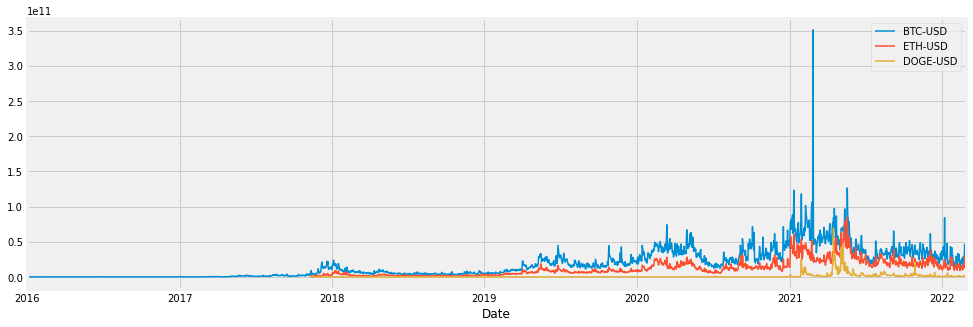

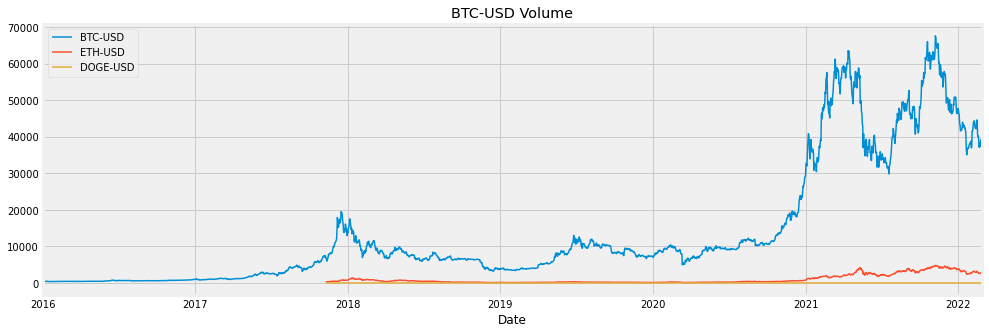

In [8]:
#for each coin name in volume calculate the percentage change
df_vol = datos['Volume']
df_vol.reset_index(level=0, inplace=True)
df_vol['Date'] = pd.to_datetime(df_vol['Date'])
df_vol = df_vol.set_index('Date')

df_close = datos['Adj Close']
df_close.reset_index(level=0, inplace=True)
df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close = df_close.set_index('Date')

#plot BTC-USD volume by date and percentage change

df_vol[['BTC-USD','ETH-USD','DOGE-USD']].plot(figsize=(15,5))
df_close[['BTC-USD','ETH-USD','DOGE-USD']].plot(figsize=(15,5))
plt.title('BTC-USD Volume')
plt.show()





In [9]:
cols = df_vol.columns
#cols = ['BTC-USD', 'ETH-USD']
#print(cols)

#calculo indice de volumen para cada moneda segun volmen de mercado...
for col in cols:
    df_close[col+'_perc'] = df_vol[col]/ df_vol[cols].sum(axis=1)


#print(df_close.shape)
#df_close.dropna(axis= 1,inplace=True)
#replace all NaN values with 0
df_close.fillna(0, inplace=True)

#print(df_close.shape)
#print(df_close.columns)
print(df_close[['BTC-USD','BTC-USD_perc','ETH-USD','ETH-USD_perc']].head())

#df_close['BTC_perc'] = df_vol['BTC-USD']/ df_vol[cols].sum(axis=1)





               BTC-USD  BTC-USD_perc  ETH-USD  ETH-USD_perc
Date                                                       
2016-01-01  434.334015      0.928560      0.0           0.0
2016-01-02  433.437988      0.908800      0.0           0.0
2016-01-03  430.010986      0.942765      0.0           0.0
2016-01-04  433.091003      0.920795      0.0           0.0
2016-01-05  431.959991      0.942539      0.0           0.0


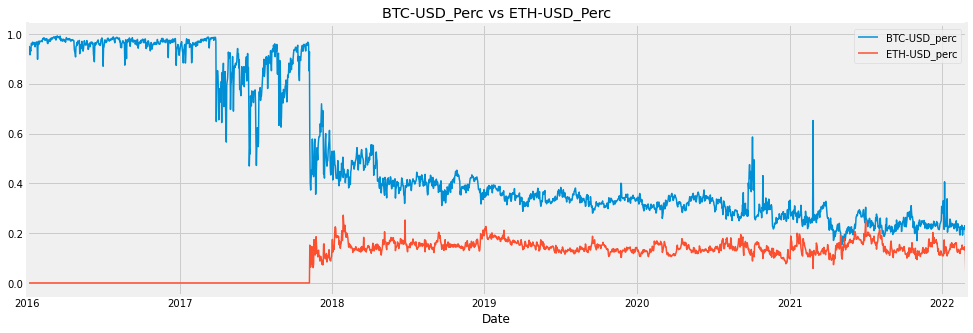

In [10]:
#plot BTC-USD_Perc vs ETH-USD_Perc
df_close[['BTC-USD_perc','ETH-USD_perc']].plot(figsize=(15,5))
plt.title('BTC-USD_Perc vs ETH-USD_Perc')
plt.show()

Text(0.5, 1.0, '% Perc vs Time')

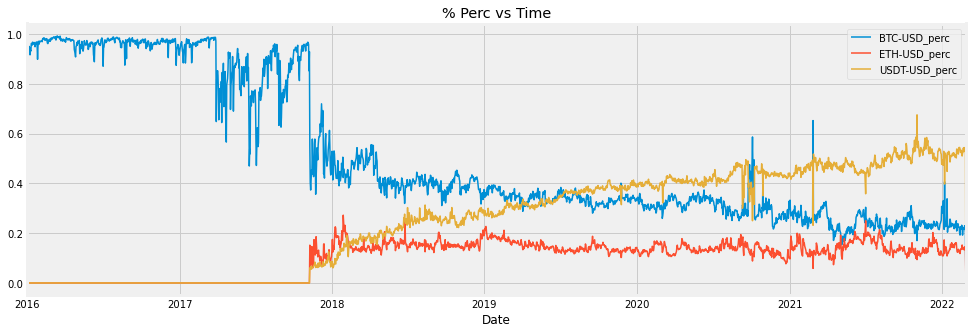

In [11]:
lista = [  'BTC-USD_perc',
        'ETH-USD_perc',
       'USDT-USD_perc', 
       #,'BNB-USD_perc','BCH-USD_perc', 'XMR-USD_perc', 'XRP-USD_perc', 'ETC-USD_perc','EOS-USD_perc', 'DOGE-USD_perc','DOT1-USD_perc'
       
       ] 
df_close[lista].plot(figsize=(15,5))
plt.title('% Perc vs Time')


In [18]:
#filtro lista
#df_close = df_close[lista]

# Normalice data
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(df_close)

# norm = StandardScaler()
# norm.fit(df_close)

df_close_norm = min_max_scaler.transform(df_close)
#df_close_norm = norm.transform(df_close)
df_close_norm = pd.DataFrame(df_close_norm, columns=df_close.columns, index=df_close.index)
df_close_norm.head()

BCH-USD  BNB-USD   BTC-USD  DOGE-USD  DOT1-USD  EOS-USD  ETC-USD  \
Date                                                                           
2016-01-01      0.0      0.0  0.006428       0.0       0.0      0.0      0.0   
2016-01-02      0.0      0.0  0.006415       0.0       0.0      0.0      0.0   
2016-01-03      0.0      0.0  0.006364       0.0       0.0      0.0      0.0   
2016-01-04      0.0      0.0  0.006410       0.0       0.0      0.0      0.0   
2016-01-05      0.0      0.0  0.006393       0.0       0.0      0.0      0.0   

            ETH-USD   LTC-USD  USDT-USD  ...  BTC-USD_perc  DOGE-USD_perc  \
Date                                     ...                                
2016-01-01      0.0  0.009080       0.0  ...      0.935094            0.0   
2016-01-02      0.0  0.009062       0.0  ...      0.915195            0.0   
2016-01-03      0.0  0.009013       0.0  ...      0.949399            0.0   
2016-01-04      0.0  0.009045       0.0  ...      0.927275            0.0   
2016-01-05      0.0  0.008978       0.0  ...      0.949171            0.0   

            DOT1-USD_perc  EOS-USD_perc  ETC-USD_perc  ETH-USD_perc  \
Date                                                                  
2016-01-01            0.0           0.0           0.0           0.0   
2016-01-02            0.0           0.0           0.0           0.0   
2016-01-03            0.0           0.0           0.0           0.0   
2016-01-04            0.0           0.0           0.0           0.0   
2016-01-05            0.0           0.0           0.0           0.0   

            LTC-USD_perc  USDT-USD_perc  XMR-USD_perc  XRP-USD_perc  
Date                                                                 
2016-01-01      0.134779            0.0           0.0           0.0  
2016-01-02      0.172058            0.0           0.0           0.0  
2016-01-03      0.107979            0.0           0.0           0.0  
2016-01-04      0.149427            0.0           0.0           0.0  
2016-01-05      0.108407            0.0           0.0           0.0  

[5 rows x 24 columns]

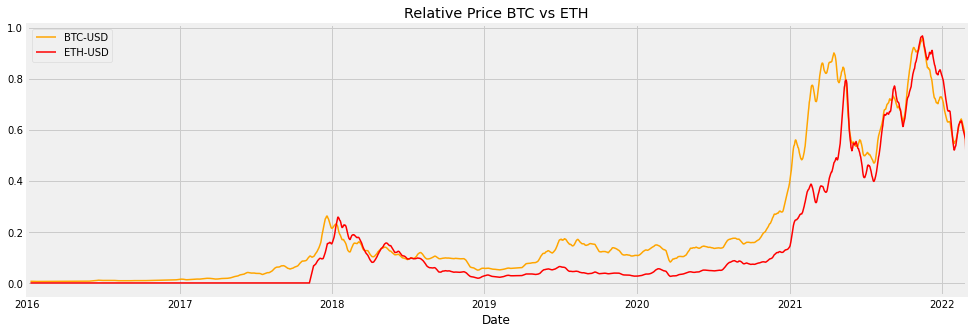

In [19]:

# df_close['BTC-USD_perc'].rolling(window=30).mean().plot(figsize=(15,5), color='red')

df_close_norm['BTC-USD'].rolling(window=10).mean().plot(figsize=(15,5), color='orange')
df_close_norm['ETH-USD'].rolling(window=10).mean().plot(figsize=(15,5), color='red')
plt.title('Relative Price BTC vs ETH')
plt.legend()
plt.show()

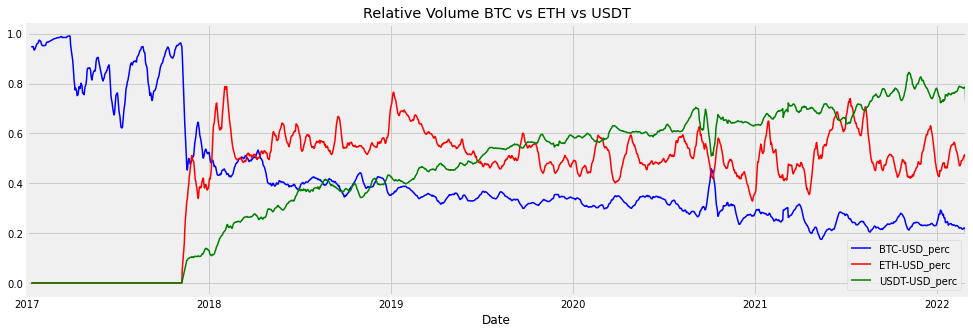

In [20]:
#slide dataset from 2018
df_close_norm = df_close_norm.loc['2017-01-01':]

# plot data in different y axis
# ==============================================================================
fig, ax = plt.subplots(figsize=(15,5))
# ax.plot(df_close_norm.index, df_close_norm['BTC-USD'], label='BTC-USD')
# ax.plot(df_close_norm.index, df_close_norm['BTC-USD_perc'], label='BTC-USD-Perc')


# df_close['BTC-USD_perc'].rolling(window=30).mean().plot(figsize=(15,5), color='red')

#df_close_norm['BTC-USD'].rolling(window=10).mean().plot(figsize=(15,5), color='orange')
df_close_norm['BTC-USD_perc'].rolling(window=10).mean().plot(figsize=(15,5), color='blue')
df_close_norm['ETH-USD_perc'].rolling(window=10).mean().plot(figsize=(15,5), color='red')
df_close_norm['USDT-USD_perc'].rolling(window=10).mean().plot(figsize=(15,5), color='green')
plt.title('Relative Volume BTC vs ETH vs USDT')
plt.legend()
plt.show()


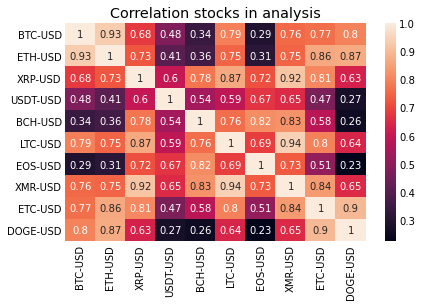

In [15]:
import seaborn as sns
#print(stocks)
#df_close[stocks].corr()
#plot heatmap
# ==============================================================================
stocks2 = ['BTC-USD', 'ETH-USD','XRP-USD','USDT-USD', 'BCH-USD', 'LTC-USD', 'EOS-USD', 'XMR-USD', 'ETC-USD', 'DOGE-USD']

sns.heatmap(df_close[stocks2].corr(), annot=True)
plt.title('Correlation stocks in analysis')
plt.show()

#sns.pairplot(df_close[['BTC-USD', 'ETH-USD','XRP-USD', 'BCH-USD', 'LTC-USD', 'EOS-USD', 'XMR-USD', 'ETC-USD', 'DOGE-USD']])


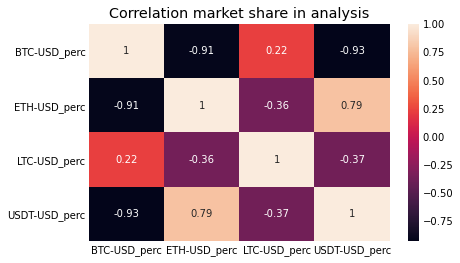

In [16]:
import seaborn as sns
#print(stocks)
#df_close[stocks].corr()
#plot heatmap
# ==============================================================================
#stocks2 = ['BTC-USD', 'ETH-USD','XRP-USD','USDT-USD', 'BCH-USD', 'LTC-USD', 'EOS-USD', 'XMR-USD', 'ETC-USD', 'DOGE-USD']
stocks2 = ['BTC-USD_perc',
        'ETH-USD_perc',
       'LTC-USD_perc', 'USDT-USD_perc']
sns.heatmap(df_close[stocks2].corr(), annot=True)
plt.title('Correlation market share in analysis')
plt.show()

In [17]:
# Verificar que un índice temporal está completo
# ==============================================================================
(datos.index == pd.date_range(
                    start = datos.index.min(),
                    end   = datos.index.max(),
                    freq  = datos.index.freq)
).all()

True

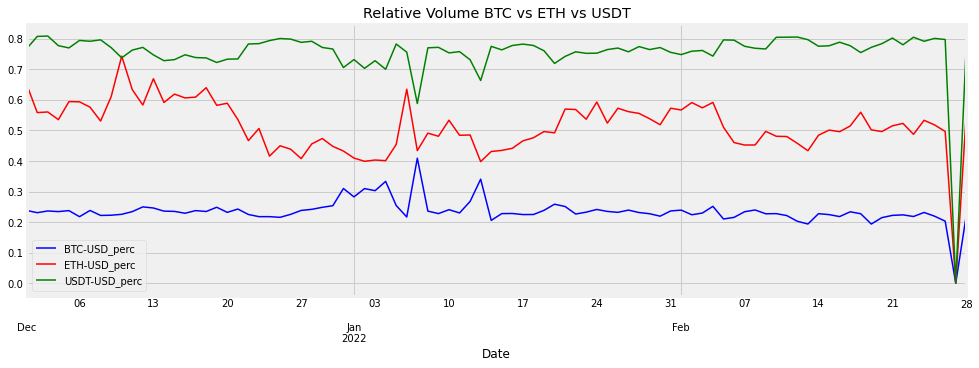

In [23]:
#slide dataset from 2018
df_close_norm2 = df_close_norm.loc['2021-12-01':]

# plot data in different y axis
# ==============================================================================
fig, ax = plt.subplots(figsize=(15,5))
# ax.plot(df_close_norm.index, df_close_norm['BTC-USD'], label='BTC-USD')
# ax.plot(df_close_norm.index, df_close_norm['BTC-USD_perc'], label='BTC-USD-Perc')


# df_close['BTC-USD_perc'].rolling(window=30).mean().plot(figsize=(15,5), color='red')

#df_close_norm['BTC-USD'].rolling(window=10).mean().plot(figsize=(15,5), color='orange')
df_close_norm2['BTC-USD_perc'].rolling(window=1).mean().plot(figsize=(15,5), color='blue')
df_close_norm2['ETH-USD_perc'].rolling(window=1).mean().plot(figsize=(15,5), color='red')
df_close_norm2['USDT-USD_perc'].rolling(window=1).mean().plot(figsize=(15,5), color='green')
plt.title('Relative Volume BTC vs ETH vs USDT')
plt.legend()
plt.show()

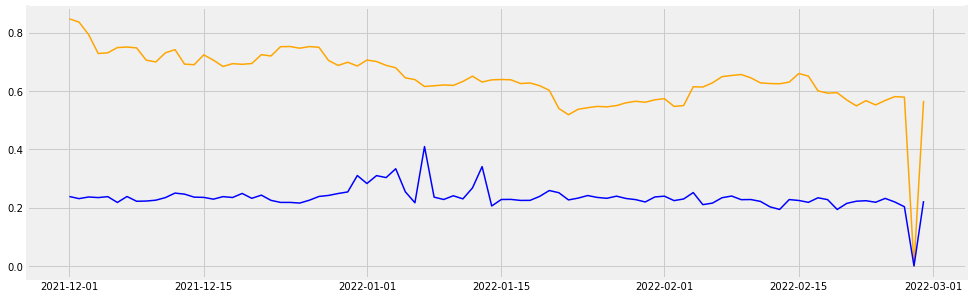

In [29]:
#plot data in different y axis with rolling mean
# ==============================================================================
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_close_norm2.index, df_close_norm2['BTC-USD'], label='BTC-USD', color='orange')
ax.plot(df_close_norm2.index, df_close_norm2['BTC-USD_perc'], label='BTC-USD-Perc', color='blue')
